In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2014.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2014,18032,246,26,3497
1,2014,17435,373,41,3565
2,2014,17233,351,27,3516
3,2014,18056,206,37,3520
4,2014,17452,379,21,3561
...,...,...,...,...,...
1863,2014,17757,433,20,3551
1864,2014,17148,244,22,3538
1865,2014,17071,323,31,3510
1866,2014,17641,203,30,3560


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1868, 5)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1868 non-null   int64
 1   Maximum length (m))  1868 non-null   int64
 2   Recession(m),        1868 non-null   int64
 3   Rate/yr(m)           1868 non-null   int64
 4   Snout altitude (m)   1868 non-null   int64
dtypes: int64(5)
memory usage: 73.1 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1868


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2014,18032,246,26,3497
1,2014,17435,373,41,3565
2,2014,17233,351,27,3516
3,2014,18056,206,37,3520
4,2014,17452,379,21,3561


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0079,-0.0148,-0.0025
"Recession(m),",NaN,0.0079,1.0000,0.0273,-0.0023
Rate/yr(m),NaN,-0.0148,0.0273,1.0000,-0.0036
Snout altitude (m),NaN,-0.0025,-0.0023,-0.0036,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0079
Snout altitude (m)    -0.0025
Rate/yr(m)            -0.0148
Year                      NaN
Name: Maximum length (m)), dtype: float64

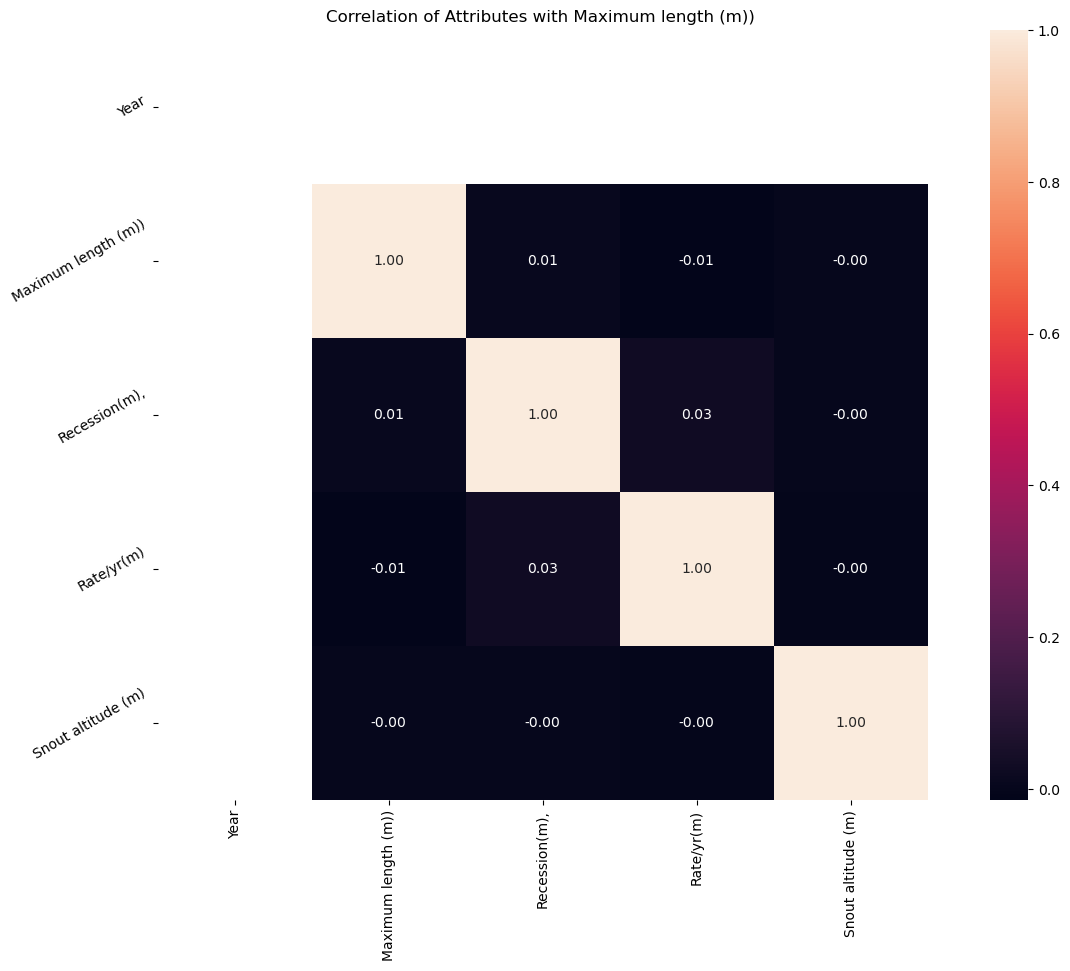

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,868.0000","1,868.0000","1,868.0000","1,868.0000","1,868.0000"
mean,"2,014.0000","17,540.2810",217.0964,27.4909,"3,531.9914"
std,0.0000,297.2124,128.0541,8.6983,20.4381
min,"2,014.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,014.0000","17,277.0000",108.0000,20.0000,"3,514.0000"
50%,"2,014.0000","17,542.0000",216.0000,27.0000,"3,532.0000"
75%,"2,014.0000","17,792.2500",324.2500,35.0000,"3,550.0000"
max,"2,014.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2014   1.0000
Name: Year, dtype: float64

152   0.0054
436   0.0054
262   0.0054
245   0.0054
117   0.0048
       ...  
324   0.0005
378   0.0005
380   0.0005
343   0.0005
184   0.0005
Name: Recession(m),, Length: 436, dtype: float64

20   0.0418
37   0.0412
25   0.0391
14   0.0385
32   0.0385
34   0.0375
18   0.0364
39   0.0359
19   0.0353
41   0.0353
27   0.0353
23   0.0348
15   0.0343
31   0.0337
38   0.0337
29   0.0327
36   0.0327
40   0.0327
13   0.0327
21   0.0316
16   0.0305
35   0.0294
30   0.0294
26   0.0289
42   0.0284
28   0.0284
33   0.0284
22   0.0278
24   0.0278
17   0.0273
Name: Rate/yr(m), dtype: float64

3517   0.0187
3511   0.0187
3538   0.0187
3551   0.0187
3506   0.0182
        ...  
3504   0.0102
3541   0.0102
3554   0.0091
3549   0.0086
3496   0.0021
Name: Snout altitude (m), Length: 72, dtype: float64



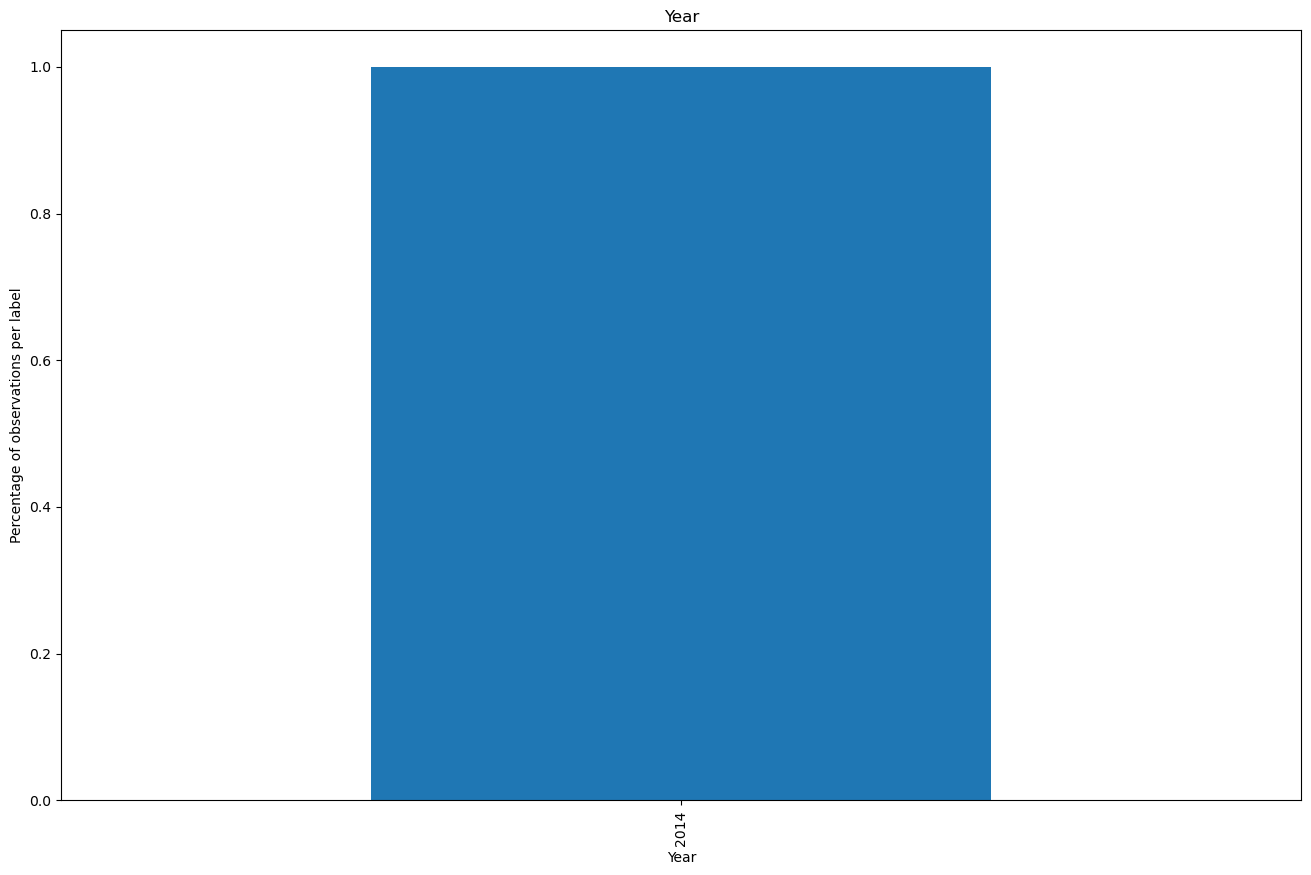

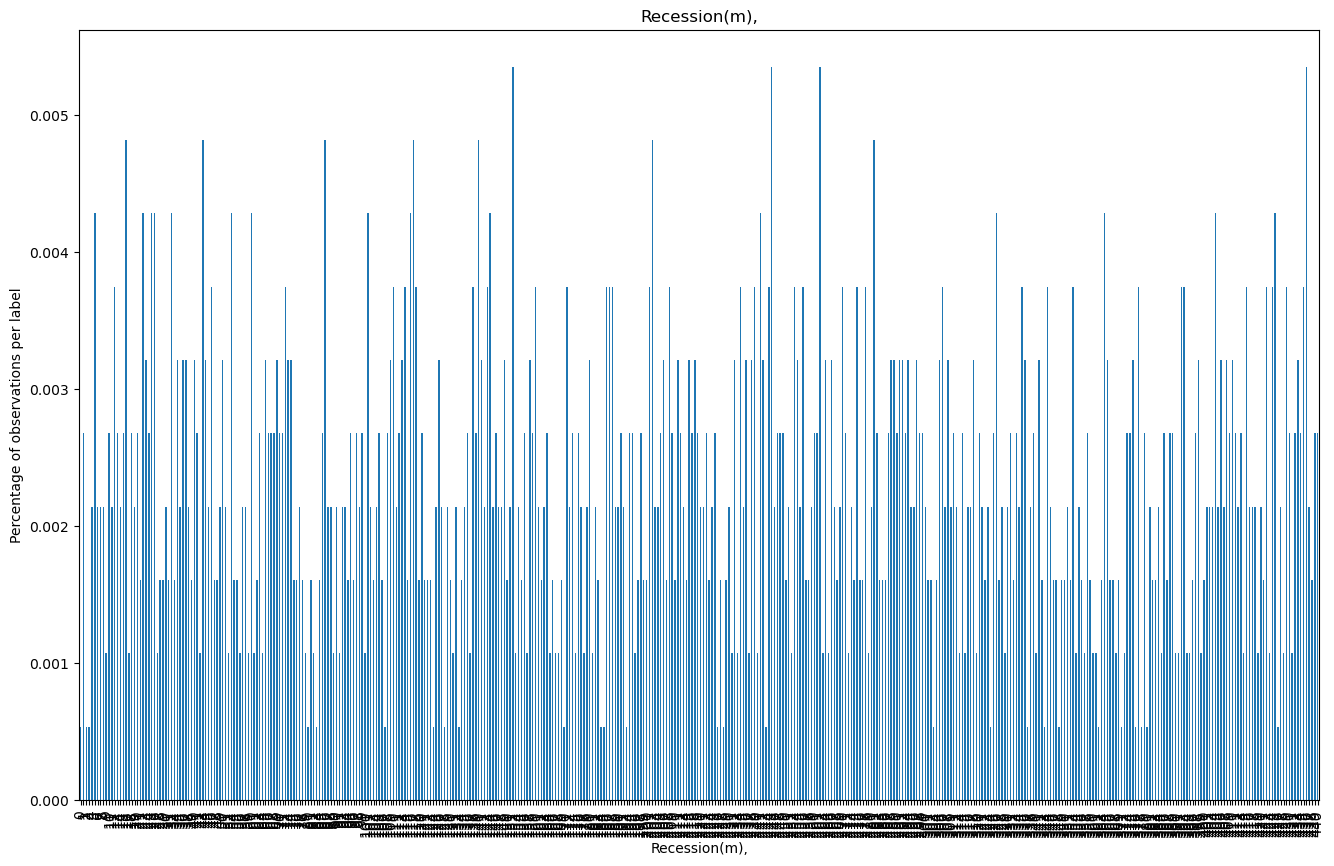

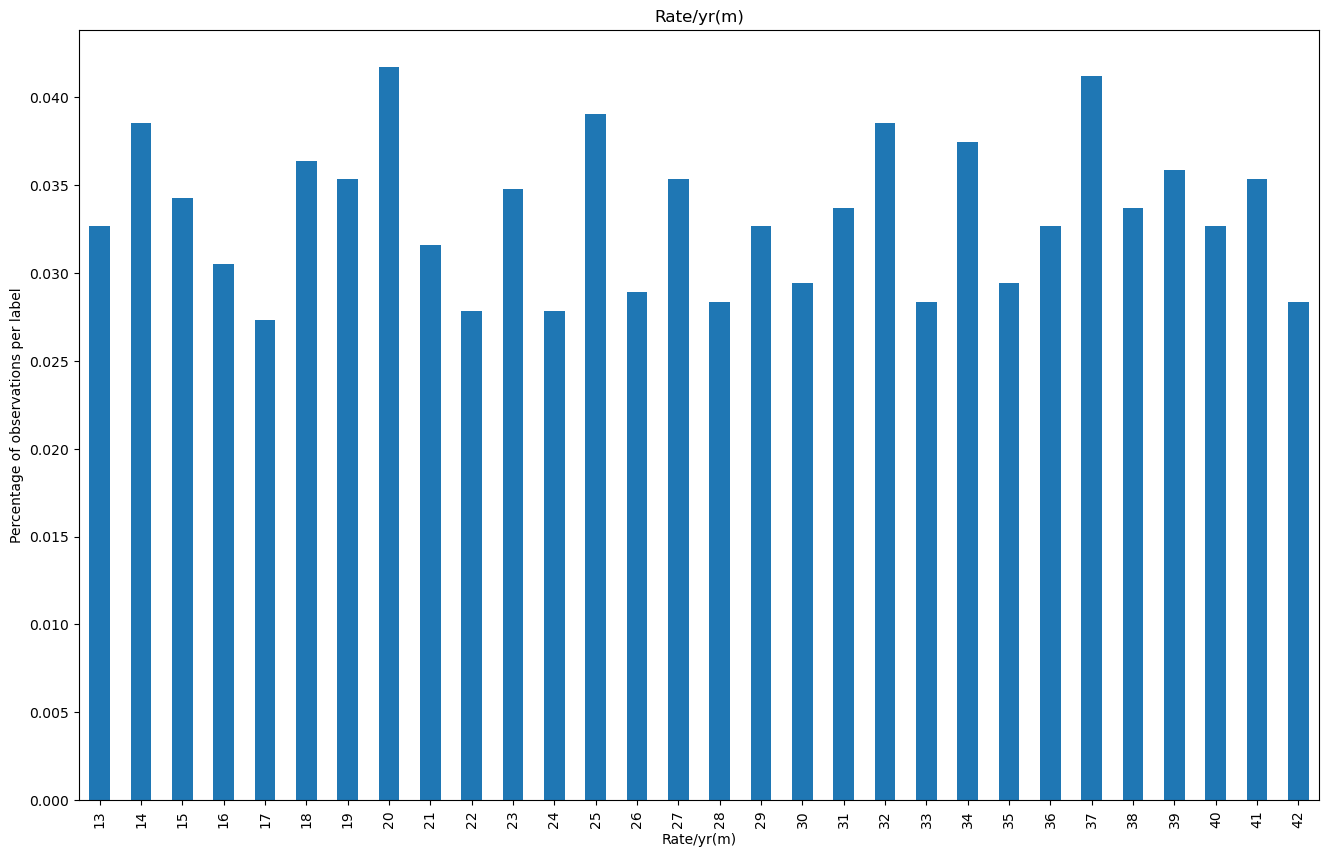

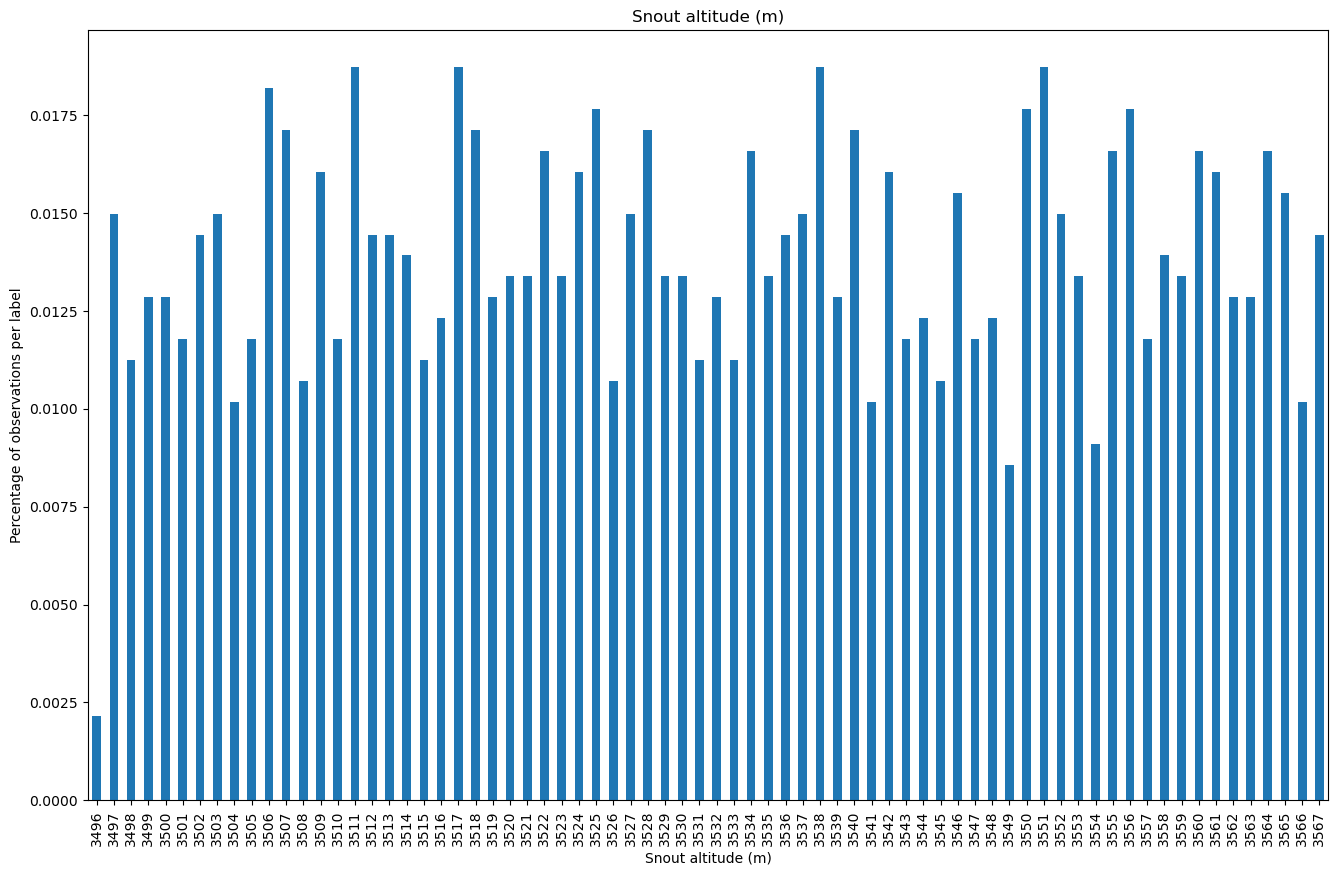

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()